## 🐶 end-to-end Multi-Class dog breed Classification

## 1.Problem
Identifying the breed of dog given an image of dog

## 2.Data
The data we are using is available at kaggle dog-breed-compitaion link is given below
https://www.kaggle.com/c/dog-breed-identification

## 3.Evaluation
Evaluation is file with prediction probabilities for each dog breed for each test image

https://www.kaggle.com/c/dog-breed-identification/overview/evaluation

## 4.Features
Some information about data
* We'are dealing with images(Unstructured data)
that's why we are going to use deep learning/transfer learning
* There are 120 breeds of dogs(This means there are 120 different classes).
* There are 10,000+ images in training set(These images have labels)
* There are 10,000+ images in Test set(These images have no labels because we are predicting them)

In [33]:
## Unzip the files in to google Drive

# !unzip "drive/MyDrive/Dog Vision/dog-breed-identification.zip" -d "drive/MyDrive/Dog Vision/dog-breed-identification"

## Get our data Ready to work with

* Import `TensorFlow`
* Import `TensorFlow Hub`
* Make sure you are using `GPU`

In [34]:
## import necessary tools

import tensorflow as tf
import tensorflow_hub as hub

print("Version of TensorFlow: ", tf.__version__)
print("TensorFlow Hub: ", hub.__version__)
print("GPU", "available (Yess..!!!!!)" if tf.config.list_physical_devices("GPU") else "not available :(")

Version of TensorFlow:  2.8.0
TensorFlow Hub:  0.12.0
GPU available (Yess..!!!!!)


## Getting our data ready (Running into Tensors)
with all machine learning models, our all data has to be in numerical format. That's what we are going to do first turning our images into Tensors
(Numerical representations)

Let's start accessing our data and checking out labels

In [35]:
# checking out labels
import pandas as pd
label_csv = pd.read_csv("drive/MyDrive/Dog Vision/dog-breed-identification/labels.csv")
print(label_csv.describe())
label_csv.head()

                                      id               breed
count                              10222               10222
unique                             10222                 120
top     000bec180eb18c7604dcecc8fe0dba07  scottish_deerhound
freq                                   1                 126


,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


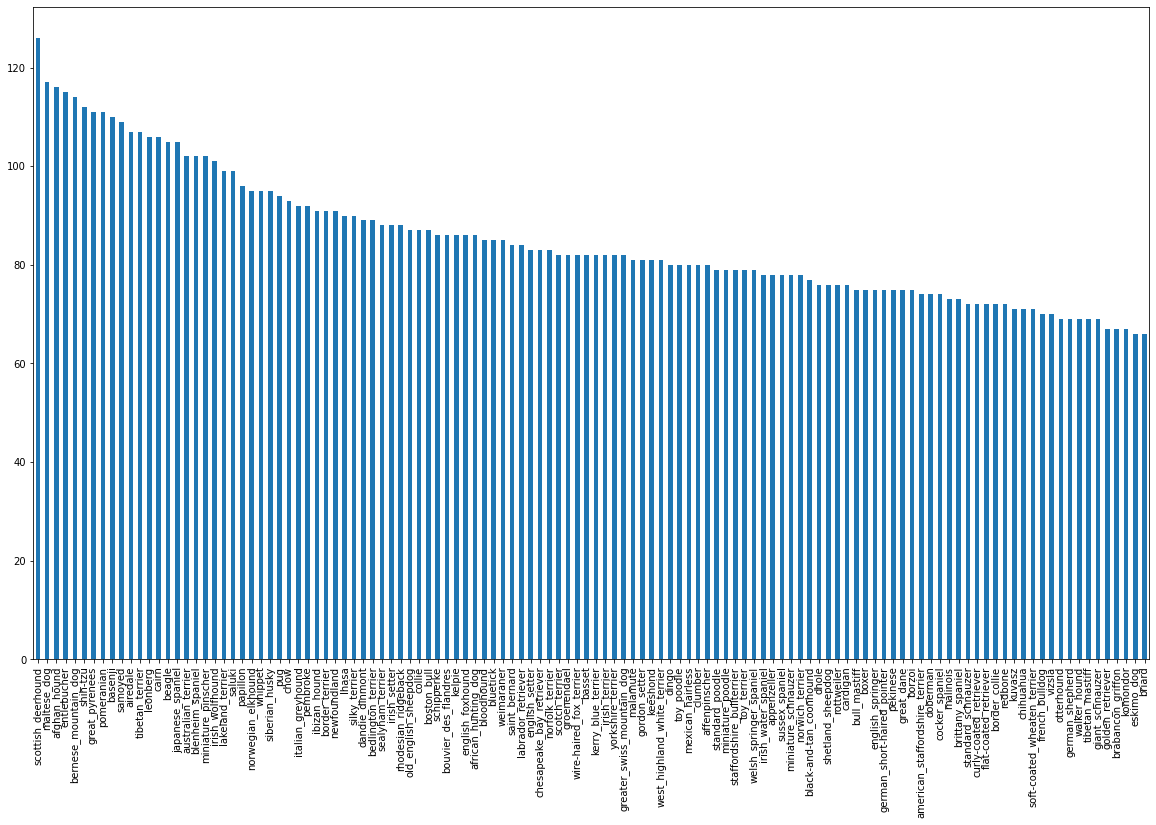

In [36]:
## Check out how many images are there in each class using bar()
label_csv['breed'].value_counts().plot.bar(figsize=(20, 12));

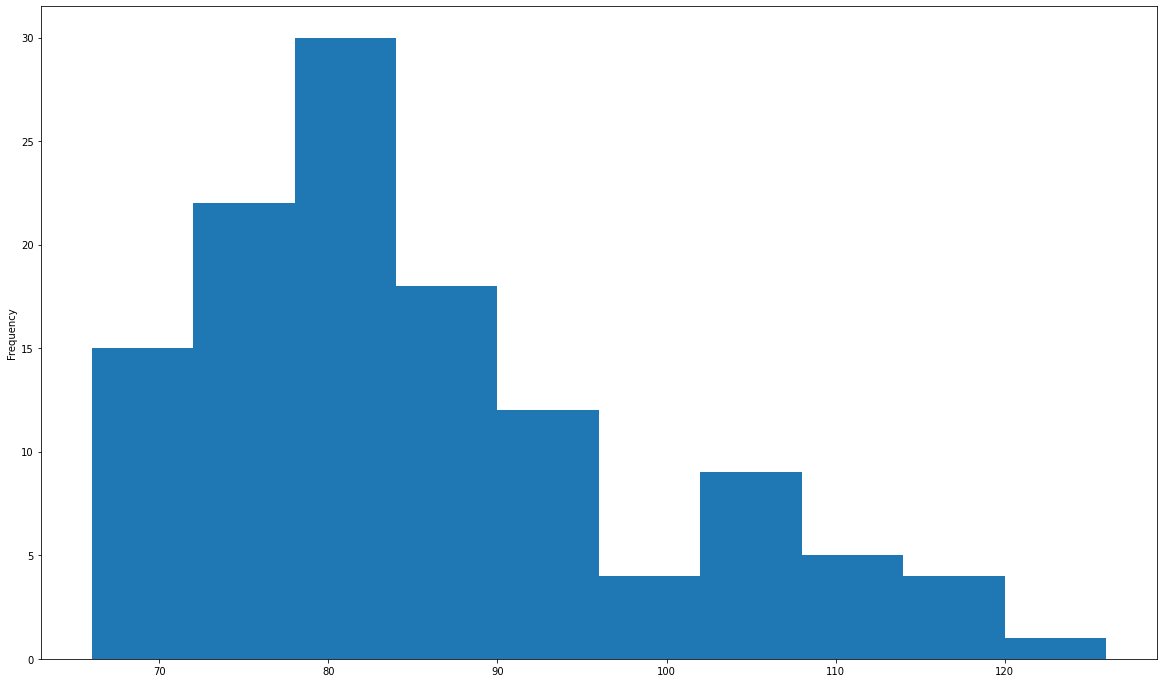

In [37]:
## Check out how many images are there in each class using hist()
label_csv['breed'].value_counts().plot.hist(figsize=(20, 12));

In [38]:
label_csv['breed'].value_counts().median()

82.0

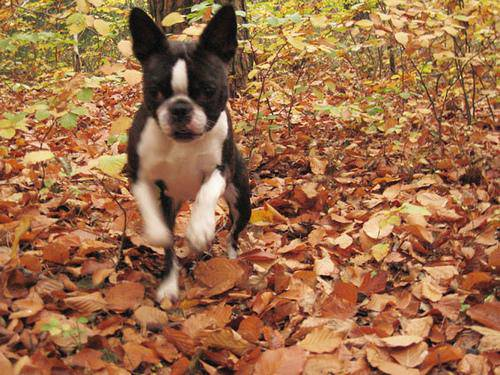

In [39]:
# Let's view the image in COLAB
from IPython.display import Image
Image('drive/MyDrive/Dog Vision/dog-breed-identification/train/000bec180eb18c7604dcecc8fe0dba07.jpg')

## Getting image names and their Labels

Let's get list of all our files pathnames

In [40]:
## creaate pathnames from image id's

filenames = ["drive/MyDrive/Dog Vision/dog-breed-identification/train"+fname for fname in label_csv['id']]

# look at first 10 
filenames[:10]


['drive/MyDrive/Dog Vision/dog-breed-identification/train/000bec180eb18c7604dcecc8fe0dba07',
 'drive/MyDrive/Dog Vision/dog-breed-identification/train/001513dfcb2ffafc82cccf4d8bbaba97',
 'drive/MyDrive/Dog Vision/dog-breed-identification/train/001cdf01b096e06d78e9e5112d419397',
 'drive/MyDrive/Dog Vision/dog-breed-identification/train/00214f311d5d2247d5dfe4fe24b2303d',
 'drive/MyDrive/Dog Vision/dog-breed-identification/train/0021f9ceb3235effd7fcde7f7538ed62',
 'drive/MyDrive/Dog Vision/dog-breed-identification/train/002211c81b498ef88e1b40b9abf84e1d',
 'drive/MyDrive/Dog Vision/dog-breed-identification/train/00290d3e1fdd27226ba27a8ce248ce85',
 'drive/MyDrive/Dog Vision/dog-breed-identification/train/002a283a315af96eaea0e28e7163b21b',
 'drive/MyDrive/Dog Vision/dog-breed-identification/train/003df8b8a8b05244b1d920bb6cf451f9',
 'drive/MyDrive/Dog Vision/dog-breed-identification/train/0042188c895a2f14ef64a918ed9c7b64']

In [41]:
## Check wheather filenames matches the actual number of images

import os
if len(os.listdir("drive/MyDrive/Dog Vision/dog-breed-identification/train")) == len(filenames):
  print("Number of filenames matches the actual number of images")

else:
  print("Number of filenames Does not matches the actual number of images")

Number of filenames matches the actual number of images


In [59]:
# Image(filenames[9000]), 
label_csv['id'][9000]

'e20e32bf114141e20a1af854ca4d0ecc'

## Since we have now got our images filepaths in a list, let's prepare our labels

In [43]:
import numpy as np

labels = label_csv['breed'].to_numpy()
# labels = np.array(label_csv) does the same as above
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [44]:
len(labels)

10222

In [45]:
## se numbe of labels matches the filenames

if len(labels) == len(filenames):
  print("Number of labels matches the number of filenames")

else:
  print("Number of labels does not matches the number of filenames")

Number of labels matches the number of filenames


In [46]:
# find the unique label values in np array
unique_breeds = np.unique(labels)
print(unique_breeds)
len(unique_breeds)

['affenpinscher' 'afghan_hound' 'african_hunting_dog' 'airedale'
 'american_staffordshire_terrier' 'appenzeller' 'australian_terrier'
 'basenji' 'basset' 'beagle' 'bedlington_terrier' 'bernese_mountain_dog'
 'black-and-tan_coonhound' 'blenheim_spaniel' 'bloodhound' 'bluetick'
 'border_collie' 'border_terrier' 'borzoi' 'boston_bull'
 'bouvier_des_flandres' 'boxer' 'brabancon_griffon' 'briard'
 'brittany_spaniel' 'bull_mastiff' 'cairn' 'cardigan'
 'chesapeake_bay_retriever' 'chihuahua' 'chow' 'clumber' 'cocker_spaniel'
 'collie' 'curly-coated_retriever' 'dandie_dinmont' 'dhole' 'dingo'
 'doberman' 'english_foxhound' 'english_setter' 'english_springer'
 'entlebucher' 'eskimo_dog' 'flat-coated_retriever' 'french_bulldog'
 'german_shepherd' 'german_short-haired_pointer' 'giant_schnauzer'
 'golden_retriever' 'gordon_setter' 'great_dane' 'great_pyrenees'
 'greater_swiss_mountain_dog' 'groenendael' 'ibizan_hound' 'irish_setter'
 'irish_terrier' 'irish_water_spaniel' 'irish_wolfhound'
 'italian

120

In [47]:
## turn a single label into an array of boolean
print(labels[0])
labels[0] == unique_breeds

boston_bull


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [48]:
## Turn every label into boolean array
boolean_label = [label == unique_breeds for label in labels]
boolean_label

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [49]:
len(boolean_label)

10222

In [50]:
## Turning boolean array into integers
print(labels[0]) #orignal label
print(np.where(unique_breeds == labels[0])) # index where label occurs
print(boolean_label[0].argmax()) # index where label occurs in boolean_array
print(boolean_label[0].astype(int)) # there will be 1 where sample label occurs

boston_bull
(array([19]),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


## Creating the validation set
Since data set from kaggle does not come with validation set so we are gona make our own

In [51]:
## Setting x and y variables
x = filenames
y = boolean_label


## We are gona start experimenting with 1000 images and increase as need

In [52]:
## se number of images to use for experimenting
NUM_IMAGES = 1000 #@param {type:"slider", min:1000, max:10000, step:1000}

## let's split our data into train and validation set using siket-learn

In [53]:
# import siket-learn tools
from sklearn.model_selection import train_test_split

# split them into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x[:NUM_IMAGES],
                                                  y[:NUM_IMAGES],
                                                  test_size=0.2,
                                                  random_state=42)


In [54]:
len(x_train), len(y_train), len(x_val), len(y_val)

(800, 800, 200, 200)

In [55]:
## lets have a geez at training data
x_train[:5], y_train[:2]

(['drive/MyDrive/Dog Vision/dog-breed-identification/train/00bee065dcec471f26394855c5c2f3de',
  'drive/MyDrive/Dog Vision/dog-breed-identification/train/0d2f9e12a2611d911d91a339074c8154',
  'drive/MyDrive/Dog Vision/dog-breed-identification/train/1108e48ce3e2d7d7fb527ae6e40ab486',
  'drive/MyDrive/Dog Vision/dog-breed-identification/train/0dc3196b4213a2733d7f4bdcd41699d3',
  'drive/MyDrive/Dog Vision/dog-breed-identification/train/146fbfac6b5b1f0de83a5d0c1b473377'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False,  True,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, Fa

## Preprocessing images(Turning images into tensors)

to preprocess images into Tensors we'are going to write a function which does few things
1. Take an image filepath as input
2. Use TensorFlow to read file and save it to variable `image`
3. Turn our `image`(a jpg) in to Tensor
4. Resize `image` to be a shape of (224, 224)
5. Return a modified `image`

before we do, let's see what importing an image looks like

In [63]:
# Convert image to NumPy array
from matplotlib.pyplot import imread
image = imread(filenames[42])
image.shape

FileNotFoundError: ignored